## Distribution marginale, intuition pour les accumulated local effect

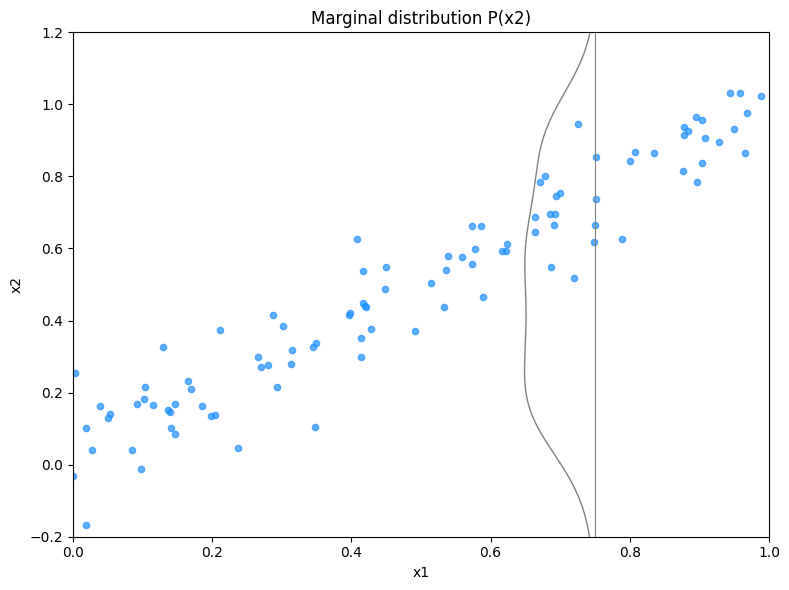

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Générer des données
np.random.seed(1)
n = 100
intercept = 0.75

x1 = np.random.rand(n)
x2 = x1 + np.random.normal(scale=0.1, size=n)

# Création de la figure
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot
ax.scatter(x1, x2, color='dodgerblue', s=20, alpha=0.7, label="Points")

# Ligne verticale pour x1 = 0.75
ax.axvline(x=intercept, color="grey", linestyle="-", linewidth=0.8)


# Distribution marginale de x2
density = gaussian_kde(x2)
x2_vals = np.linspace(x2.min() - 0.2, x2.max() + 0.2, 500)
density_vals = density(x2_vals)

# Tracer la distribution marginale le long de la ligne verticale
ax.plot(intercept - density_vals / 10, x2_vals, color="grey", linewidth=1)

# Mise à jour des limites et titre
ax.set_xlim(0, 1)
ax.set_ylim(-0.2, 1.2)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Marginal distribution P(x2)")

plt.tight_layout()
plt.show()


## Local accumualted effect, découper l'espace en interval

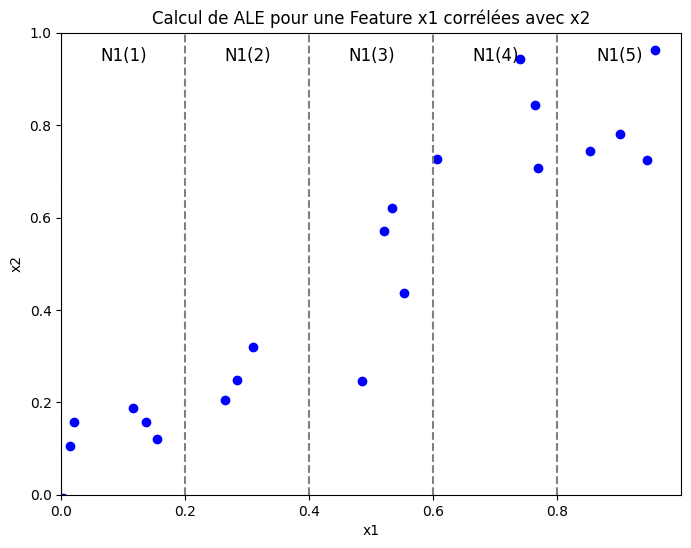

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

# Set random seed for reproducibility
np.random.seed(12)

# Generate data
n = 25
x1 = np.random.uniform(0, 1, n)
x2 = x1 + np.random.normal(scale=0.1, size=n)
df = pd.DataFrame({'x1': x1, 'x2': x2})

# Create grid points for intervals
grid_x1 = np.linspace(0, 1, 6)[:-1]  # Interval limits (excluding the last)
grid_df = pd.DataFrame({'x1': grid_x1, 'x2': [np.nan] * len(grid_x1)})

# Create label points
label_df = grid_df.copy()
label_df['x1'] = label_df['x1'] + 0.1
label_df['x2'] = 0.95
label_df['label'] = [f"N1({i+1})" for i in range(5)]

# Filter data for one specific range
diff_df = df[(df['x1'] <= 0.8) & (df['x1'] > 0.6)]

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of the data points
ax.scatter(df['x1'], df['x2'], color='blue', label='Data Points')

# Plot vertical lines for intervals
for x in grid_x1:
    ax.axvline(x, linestyle='--', color='gray')

# Annotate the grid lines with labels
for _, row in label_df.iterrows():
    ax.text(row['x1'], row['x2'], row['label'], ha='center', va='center', fontsize=12)


# Customize the plot
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xticks(grid_x1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Calcul de ALE pour une Feature x1 corrélées avec x2')

# Remove gridlines
ax.grid(False)

plt.show()
